In [1]:
import pandas as pd

amount = pd.read_csv("amount.csv")

risk_incident = pd.read_csv("risk_incident.csv")
risk_type = pd.read_csv("risk_type.csv")

In [7]:
amount_incident = pd.merge(amount, risk_incident, on = "Transaction_ID") # Inner Join
amount_incident = amount_incident.set_index("Transaction_ID") # Set Index
amount_incident.head()

,Amount,Risk_Incident
Transaction_ID,,
TXN00001,952.11,0
TXN00002,3293.29,1
TXN00003,2849.97,0
TXN00004,9813.53,0
TXN00005,1228.69,0


In [23]:
# Before Visualization, mitigate the range of amount for clear visualization.
# check describe() and divide 4 ranges
amount_incident.describe() 
# Divide four section and check what section has the most risk incidents
amount_incident.head()

amount_incident_Q = amount_incident.copy()
amount_incident_Q["Amount_Q"] = pd.qcut(amount_incident_Q["Amount"], q=4, labels=["Q1","Q2","Q3","Q4"])

incident_summary = amount_incident_Q.groupby("Amount_Q")["Risk_Incident"].agg(
    Risk_Count = "sum",
    Total = "count",
    Risk_Rate = "mean"
).reset_index()

print(incident_summary)
incident_summary.head()

  Amount_Q  Risk_Count  Total  Risk_Rate
0       Q1         354   2500     0.1416
1       Q2         355   2500     0.1420
2       Q3         356   2500     0.1424
3       Q4         383   2500     0.1532


C:\Users\ksung\AppData\Local\Temp\ipykernel_28728\2573060993.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_summary = amount_incident_Q.groupby("Amount_Q")["Risk_Incident"].agg(


,Amount_Q,Risk_Count,Total,Risk_Rate
0,Q1,354,2500,0.1416
1,Q2,355,2500,0.1420
2,Q3,356,2500,0.1424
3,Q4,383,2500,0.1532


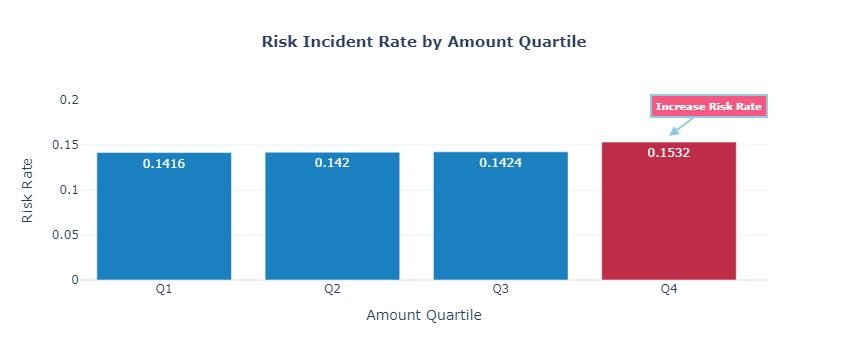

In [32]:
import plotly.graph_objects as go
colors = ['#1B80BF'] * len(incident_summary["Amount_Q"])
for index in range(3, len(incident_summary["Amount_Q"])): # 15부터 끝까지 색상변경(평균시간이 감소해서)
    colors[index] = '#BF2C47' # 색깔로 포인트
    
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = incident_summary["Amount_Q"],
        y = incident_summary["Risk_Rate"],

        text=incident_summary["Risk_Rate"],
        textposition="auto",
        marker_color=colors
    )
)

fig.update_layout(
    {
        "title" : {
            "text" : "<b>Risk Incident Rate by Amount Quartile<b>",
            "x" : 0.5,
            "y" : 0.9,
            "font":{
                "size":15
            }
        },
        "xaxis": {
            "title": "Amount Quartile",  # x축 제목 
            "showticklabels": True,                  # x축 눈금 라벨을 표시
            "tickfont": {
                "size": 12  # x축 눈금 라벨의 글꼴 크기를 7로 지정
            }
        },
        "yaxis": {
            "title": "Risk Rate",  # y축 제목 
            "range": [0, 0.2]
        },
        "template": 'plotly_white'  # 그래프 전체의 템플릿을 'plotly_white' (흰색 배경)로 설정
    }
)

# 특정 데이터 포인트에 주석(Annotation) 추가
fig.add_annotation(
    x="Q4",                        # 주석의 x좌표: Q4
    y=0.16,                                # 주석의 y좌표: 
    text="<b>Increase Risk Rate</b>",      # 주석에 표시할 텍스트 (굵게 표시)
    showarrow=True,                        # 주석에 화살표를 표시하도록 설정
    font=dict(
        size=10,                           # 주석 텍스트의 글꼴 크기를 10으로 지정
        color="#ffffff"                    # 주석 텍스트의 색상을 흰색(#ffffff)으로 지정
    ),
    align="center",                        # 주석 텍스트를 중앙 정렬
    arrowhead=2,                           # 화살표 머리의 스타일을 2번으로 설정
    arrowsize=1,                           # 화살표의 크기를 1로 설정
    arrowwidth=2,                          # 화살표 선의 두께를 2로 설정
    arrowcolor="#77BDD9",                  # 화살표의 색상을 지정
    ax=40,                                 # 화살표 꼬리의 x축 오프셋(픽셀 단위)
    ay=-30,                                # 화살표 꼬리의 y축 오프셋(픽셀 단위)
    bordercolor="#77BDD9",                  # 주석 상자의 테두리 색상을 지정
    borderwidth=2,                         # 주석 상자의 테두리 두께를 2로 설정
    borderpad=4,                           # 주석 상자 내부의 패딩(여백)을 4로 설정
    bgcolor="#F22E62",                     # 주석 상자의 배경색을 지정
    opacity=0.8                            # 주석 상자의 불투명도를 0.8로 설정 (약간 투명)
)

# 최종 그래프를 화면에 표시
fig.show()
            
        
    
    


### These results are not clear, but we can infer that the more amount increase, the more risk rate get bigger a little

In [24]:
# 1. Correlation of amount_incident
# 2. boxplot of amount_incident
# 3. HeatMap of amount_incidnet

# 1 Not any correlation (0.012934)
corr = amount_incident.corr(numeric_only=True)
print(corr)

                 Amount  Risk_Incident
Amount         1.000000       0.012934
Risk_Incident  0.012934       1.000000


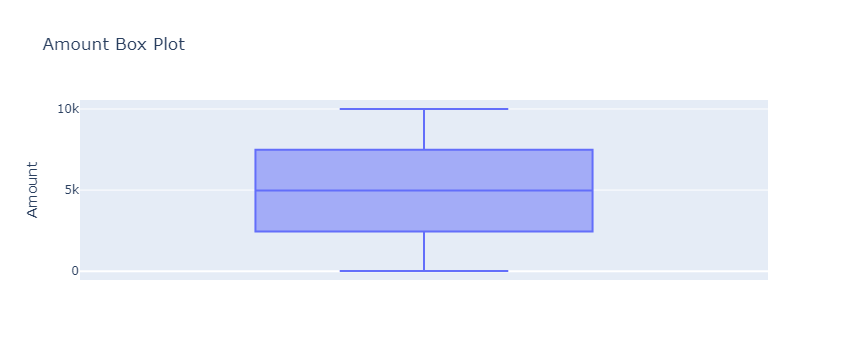

In [35]:
# 2. 
import plotly.express as px

fig = px.box(
    amount_incident["Amount"],
    y="Amount",
    title = "Amount Box Plot",
    labels = {"Amount" : "Amount"}
)

fig.show()

In [36]:
# 3. HeatMap with 10 sections of amount
amount_incident_Q2 = amount_incident.copy()
amount_incident_Q2["Amount_Q"] = pd.qcut(amount_incident_Q2["Amount"], q=10, labels=["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10"])

incident_summary = amount_incident_Q2.groupby("Amount_Q")["Risk_Incident"].agg(
    Risk_Count = "sum",
    Total = "count",
    Risk_Rate = "mean"
).reset_index()

print(incident_summary)
incident_summary.head()

  Amount_Q  Risk_Count  Total  Risk_Rate
0       Q1         126   1000      0.126
1       Q2         151   1000      0.151
2       Q3         143   1000      0.143
3       Q4         140   1000      0.140
4       Q5         149   1000      0.149
5       Q6         150   1000      0.150
6       Q7         137   1000      0.137
7       Q8         145   1000      0.145
8       Q9         147   1000      0.147
9      Q10         160   1000      0.160


C:\Users\ksung\AppData\Local\Temp\ipykernel_28728\4111720284.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Amount_Q,Risk_Count,Total,Risk_Rate
0,Q1,126,1000,0.126
1,Q2,151,1000,0.151
2,Q3,143,1000,0.143
3,Q4,140,1000,0.140
4,Q5,149,1000,0.149


In [94]:
# Preprocessing for Date
PATH = "accounting_dataset.csv"
doc = pd.read_csv(PATH)

doc.head(20)
date = doc[["Transaction_ID", "Date"]]
date.head()
# date.duplicated() # must change to datetim type

,Transaction_ID,Date
0,TXN00001,2024-08-18
1,TXN00002,2024-11-26
2,TXN00003,2024-04-30
3,TXN00004,2024-03-23
4,TXN00005,2024-07-03


In [95]:
date["Date"] = pd.to_datetime(date["Date"], format="%Y-%m-%d", errors="raise")
date["Date"].dtype # dtype('<M8[ns]')

C:\Users\ksung\AppData\Local\Temp\ipykernel_28728\4210175468.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('<M8[ns]')

In [96]:
date.isnull().sum() # 1 -> unnecessary value
date = date.dropna()

# Monthly 
date["YearMonth"] = date["Date"].dt.to_period("M")
date.head()
date.to_csv("date.csv", index = False)
date = date.set_index("Transaction_ID") # Set Index

In [100]:
# Merge Two CSVFile
monthly_q_summary = pd.merge(amount_incident_Q2, date, on = "Transaction_ID") # Inner Join
monthly_q_summary.head()

,Amount,Risk_Incident,Amount_Q,Date,YearMonth
Transaction_ID,,,,,
TXN00001,952.11,0,Q1,2024-08-18,2024-08
TXN00002,3293.29,1,Q4,2024-11-26,2024-11
TXN00003,2849.97,0,Q3,2024-04-30,2024-04
TXN00004,9813.53,0,Q10,2024-03-23,2024-03
TXN00005,1228.69,0,Q2,2024-07-03,2024-07


In [111]:
# Merge with date and amount_incident_Q2
# If use pivot_table to make heatmap, naturally apply grouping
pivot_df = monthly_q_summary.pivot_table(
    index = "Amount_Q",
    columns = "YearMonth",
    values = "Risk_Incident",
    aggfunc = "mean"
).sort_index()

C:\Users\ksung\AppData\Local\Temp\ipykernel_28728\691352123.py:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



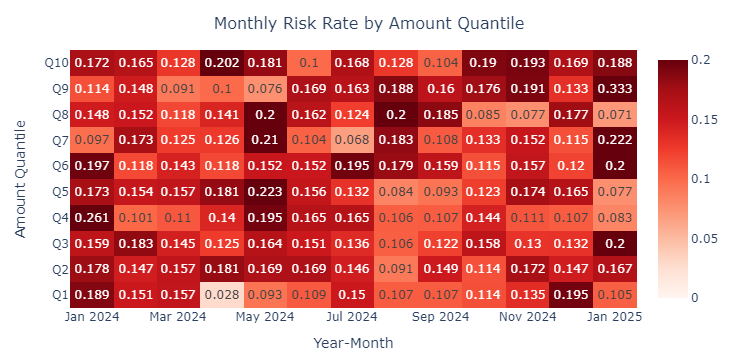

In [112]:
import plotly.graph_objects as go

# Type of YearMonth is pandas.Period which cannot be converted into heatmap.
# So, we need to convert it into PeriodIndex
pivot_df.index = pivot_df.index.astype(str)
pivot_df.columns = pivot_df.columns.astype(str)

fig = go.Figure(
    data=go.Heatmap(
        z=pivot_df.values,
        x=pivot_df.columns,
        y=pivot_df.index,
        zmin=0,
        zmax=0.2,
        colorscale='Reds',
        text=pivot_df.round(3).values,
        texttemplate="%{text}",
        hovertemplate="Month: %{y}<br>Quantile: %{x}<br>Risk: %{z:.3f}<extra></extra>"
    )
)

fig.update_layout(
    title=dict(
        text="Monthly Risk Rate by Amount Quantile",
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    xaxis=dict(title="Year-Month"),
    yaxis=dict(title="Amount Quantile"),
    margin=dict(t=50, b=50, l=70, r=20)
)

fig.show()